### Assignment 3 - Logistic Regression

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In this assignment, we will build logistic regression models to detect accounting fraud using financial statement features. <br>
The data was collected by Bao et al. (2020) based on the detected material accounting misstatements disclosed in the SEC’s Accounting and Auditing Enforcement Releases (AAERs). <br>
The dataset covers all publicly listed U.S. firms over the period 1990– 2014. The variable name of the fraud label is "misstate" (1 denotes fraud, and 0 denotes non-fraud). <br>
We will use both raw financial data from the financial statements and the financial ratios that are used to evaluate the financial performance of a company for detection.<br>

You may find the description of variables in the Word document.

The description of the 28 raw accounting variables:\
act -- Current Assets, Total\
ap -- Account Payable, Trade\
at -- Assets, Total\
ceq - -Common/Ordinary Equity, Total\
che -- Cash and Short-Term Investments\
cogs -- Cost of Goods Sold\
csho -- Common Shares Outstanding\
dlc -- Debt in Current Liabilities, Total\
dltis -- Long-Term Debt Issuance\
dltt -- Long-Term Debt, Total\
dp -- Depreciation and Amortization\
ib -- Income Before Extraordinary Items\
invt -- Inventories, Total\
ivao -- Investment and Advances, Other\
ivst -- Short-Term Investments, Total\
lct -- Current Liabilities, Total\
lt -- Liabilities, Total\
ni -- Net Income (Loss)\
ppegt -- Property, Plant and Equipment, Total\
pstk -- Preferred/Preference Stock (Capital), Total\
re -- Retained Earnings\
rect -- Receivables, Total\
sale -- Sales/Turnover (Net)\
sstk -- Sale of Common and Preferred Stock\
txp -- Income Taxes Payable\
txt -- Income Taxes, Total\
xint -- Interest and Related Expense, Total\
prcc_f -- Price Close, Annual, Fiscal

The description of the 14 financial ratio variables:\
dch_wc -- WC accruals\
ch_rsst -- RSST accruals\
dch_rec -- Change in receivables\
dch_inv -- Change in inventory\
soft_assset -- % Soft assets\
dpi -- Depreciation index\
ch_cs -- Change in cash sales\
ch_cm -- Change in cash margin\
ch_roa -- Change in return on assets\
ch_fcf -- Change in free cash flows\
reoa -- Retained earnings over total assets\
EBIT -- Earnings before interest and taxes over total assets\
issue -- Actual issuance\
bm -- Book-to-market

1. Import the libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

2. Read in the dataset and display basic information about the dataset.

In [3]:
# Loading in the dataset
accounting_df = pd.read_csv('Datasets/AccountingFraud.csv')

In [4]:
# Preview dataset and row/column count
print(accounting_df.shape)
accounting_df.head()

(146045, 44)


,fyear,misstate,act,ap,at,ceq,che,cogs,csho,dlc,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


In [5]:
# Dtypes and row counts
accounting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 44 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   misstate     146045 non-null  int64  
 2   act          146045 non-null  float64
 3   ap           146045 non-null  float64
 4   at           146045 non-null  float64
 5   ceq          146045 non-null  float64
 6   che          146045 non-null  float64
 7   cogs         146045 non-null  float64
 8   csho         146045 non-null  float64
 9   dlc          146045 non-null  float64
 10  dltis        146045 non-null  float64
 11  dltt         146045 non-null  float64
 12  dp           146045 non-null  float64
 13  ib           146045 non-null  float64
 14  invt         146045 non-null  float64
 15  ivao         146045 non-null  float64
 16  ivst         146045 non-null  float64
 17  lct          146045 non-null  float64
 18  lt           146045 non-

In [6]:
# Explore nulls
accounting_df.isnull().sum()

fyear              0
misstate           0
act                0
ap                 0
at                 0
ceq                0
che                0
cogs               0
csho               0
dlc                0
dltis              0
dltt               0
dp                 0
ib                 0
invt               0
ivao               0
ivst               0
lct                0
lt                 0
ni                 0
ppegt              0
pstk               0
re                 0
rect               0
sale               0
sstk               0
txp                0
txt                0
xint               0
prcc_f             0
dch_wc          4759
ch_rsst         4851
dch_rec         4743
dch_inv         4615
soft_assets      592
ch_cs          15918
ch_cm          17107
ch_roa         12678
issue              0
bm                18
dpi             9228
reoa             591
EBIT             591
ch_fcf          5407
dtype: int64

Looks like only some financial ratios are missing values. This could be because financial ratios are not explicitly required to be reported in a financial report/audit, leading to them not being included for some rows. However, all 28 accounting variables are all non-null and numeric.

3. Explore the variable 'misstate' with a graph. What do you observe?

misstate
0    145081
1       964
Name: count, dtype: int64
Total fraud percentage: 0.66%


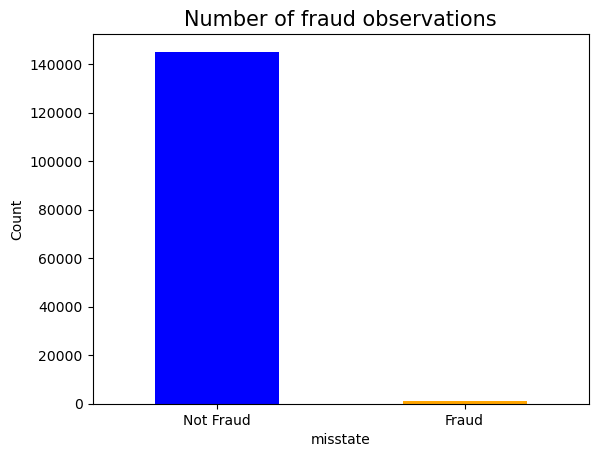

In [7]:
# Exploring frequency of fraud
print(accounting_df['misstate'].value_counts())
percent_fraud = accounting_df['misstate'].value_counts()[1]/len(accounting_df['misstate'])
print(f'Total fraud percentage: {percent_fraud:.2%}')

accounting_df['misstate'].value_counts().plot(kind= 'bar', color = ['blue', 'orange'])
plt.title(label = 'Number of fraud observations', size = 15)
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'], rotation = 0);

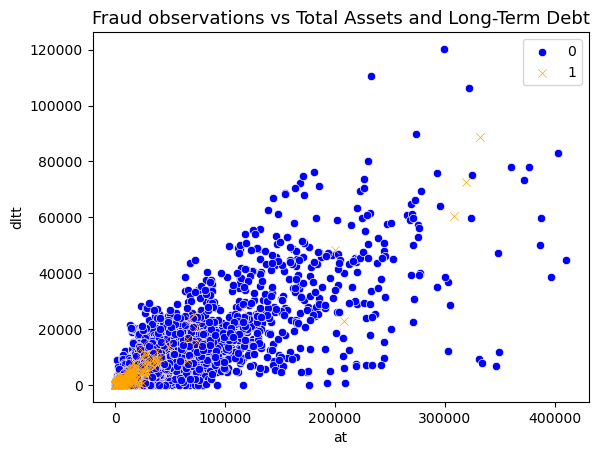

In [ ]:
# Comparing against total assets and long term debt to see if companies in debt are more likely to be fraudulent
sns.scatterplot(data = accounting_df[accounting_df['misstate'] == 0], x = 'at', y = 'dltt', 
                color = 'blue', label = '0', zorder = 1)
sns.scatterplot(data = accounting_df[accounting_df['misstate'] == 1], x = 'at', y = 'dltt', 
                color = 'orange', marker = 'x', label = '1', zorder = 2);
plt.title(label = "Fraud observations vs Total Assets and Long-Term Debt", size = 13);

From the bar chart measuring the frequency of fraud observations in the dataset, it is clear that fraudulent observations make up a very small percentage of the total, with only 0.66% of the observations being fraudulent.

The scatterplot provides a little more information. I decided to see what fraudulent observations look like compared to the company's total assets and long-term liabilities. Expectedly, we see a positive correlation between total assets and long-term debt. More importantly, it is apparent by the large cluster of orange x's toward the lower values that small firms have historically commited fraud more than the larger companies. This could be because smaller firms feel more inclined to commit fraud due to stress from limited financial resources.

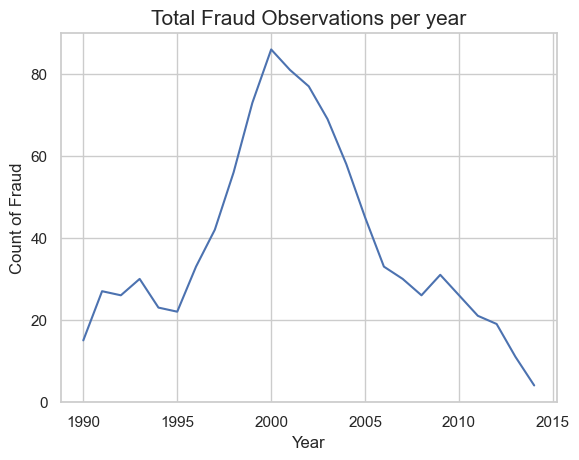

In [16]:
# Sum of fraud cases by year
fraud_by_year = accounting_df.groupby('fyear')['misstate'].sum().reset_index()

sns.set_theme(style ='whitegrid')
sns.lineplot(x = fraud_by_year['fyear'], y = fraud_by_year['misstate'])
plt.title('Total Fraud Observations per year', size = 15)
plt.xlabel('Year')
plt.ylabel('Count of Fraud');

Save the output of the code above and make a line graph based on it. What do you observe?

Fraudulent observations had a sharp increase from 1995-2000, peaking at slightly over 80 cases per year. The sharp decline from 2000-2008 could be due to more strict regulations that were placed on companies following such an increase in fraud. There was another decline in fraud observations per year after 2008 which could be due to another increase in regulation following the 2008 financial crisis.

5. The percentage of fraud cases is really small. To have better prediction power, we intend to oversample the fraud cases to 10% of the sample.

In [10]:
# Separate into minority and majority
minority_class = accounting_df[accounting_df['misstate'] == 1]
majority_class = accounting_df[accounting_df['misstate'] == 0]

# Count minority and majority samples
minority_count = len(minority_class)
majority_count = len(majority_class)
print("Original class distribution:", accounting_df['misstate'].value_counts())

###############################
# Desired ratio = 10% / 90%   #
###############################
# For a 10/90 ratio, 1:9 (minority : majority)
# If we have 'N' majority samples, we want M' = N/9 minority samples.

RATIO = 9  # 1 minority : 9 majority
majority_N = majority_count

# Calculate how many minority samples we need to achieve 10/90 ratio
minority_needed = int(np.ceil(majority_N / RATIO))

# If we already have enough minority samples, no oversampling needed
# Otherwise, sample (with replacement) from the minority to get the required count
if minority_needed <= minority_count:
    oversampled_minority = minority_class
else:
    # Randomly sample with replacement to reach minority_needed
    oversampled_minority = minority_class.sample(n=minority_needed, replace=True, random_state=0)

# Combine the new minority subset with the entire majority
fraud_oversampled = pd.concat([oversampled_minority, majority_class])

# Shuffle the dataset
fraud_oversampled = fraud_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print("New class distribution:", fraud_oversampled['misstate'].value_counts())

Original class distribution: misstate
0    145081
1       964
Name: count, dtype: int64
New class distribution: misstate
0    145081
1     16121
Name: count, dtype: int64


6. Drop the observations with missing values.

In [11]:
# Check for nulls
print('Nulls in columns:')
fraud_oversampled.isna().sum()

# Drop and recheck
fraud_oversampled = fraud_oversampled.dropna()
print('Nulls in columns after dropping nulls:')
fraud_oversampled.isna().sum()

Nulls in columns:


fyear              0
misstate           0
act                0
ap                 0
at                 0
ceq                0
che                0
cogs               0
csho               0
dlc                0
dltis              0
dltt               0
dp                 0
ib                 0
invt               0
ivao               0
ivst               0
lct                0
lt                 0
ni                 0
ppegt              0
pstk               0
re                 0
rect               0
sale               0
sstk               0
txp                0
txt                0
xint               0
prcc_f             0
dch_wc          5011
ch_rsst         5156
dch_rec         4937
dch_inv         4840
soft_assets      592
ch_cs          16570
ch_cm          17802
ch_roa         13290
issue              0
bm                18
dpi             9509
reoa             591
EBIT             591
ch_fcf          5712
dtype: int64

Nulls in columns after dropping nulls:


fyear          0
misstate       0
act            0
ap             0
at             0
ceq            0
che            0
cogs           0
csho           0
dlc            0
dltis          0
dltt           0
dp             0
ib             0
invt           0
ivao           0
ivst           0
lct            0
lt             0
ni             0
ppegt          0
pstk           0
re             0
rect           0
sale           0
sstk           0
txp            0
txt            0
xint           0
prcc_f         0
dch_wc         0
ch_rsst        0
dch_rec        0
dch_inv        0
soft_assets    0
ch_cs          0
ch_cm          0
ch_roa         0
issue          0
bm             0
dpi            0
reoa           0
EBIT           0
ch_fcf         0
dtype: int64

7. Now let's fit logistic regression models. First, we only use the 14 financial ratio variables as the independent variables.

Prepare the data.

In [12]:
# Print columns to include in model
fraud_oversampled.columns

Index(['fyear', 'misstate', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho',
       'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt',
       'ni', 'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt',
       'xint', 'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv',
       'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'issue', 'bm', 'dpi', 'reoa',
       'EBIT', 'ch_fcf'],
      dtype='object')

In [13]:
# Prepare design matrices
import patsy
y, X = patsy.dmatrices('misstate ~ dch_wc + ch_rsst + dch_rec + dch_inv + soft_assets + ch_cs + ch_cm + ch_roa + issue + bm + dpi + reoa + EBIT + ch_fcf',
                       data = fraud_oversampled, 
                       return_type = 'dataframe')

In [14]:
y.head()
X.head()

,misstate
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


,Intercept,dch_wc,ch_rsst,dch_rec,dch_inv,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1.0,-0.017130,0.038728,0.027232,0.000000,0.758092,0.113496,0.002983,0.017743,1.0,-0.013143,1.015461,-0.020145,0.156203,-0.017061
1,1.0,0.000442,0.056790,0.053902,0.002753,0.667372,0.136650,-0.026086,-0.056082,1.0,0.500723,0.956909,-0.153961,0.095371,-0.099782
2,1.0,-0.033386,-0.034261,0.005941,0.057588,0.847837,-0.004891,-1.298314,0.022018,1.0,0.537135,0.956197,-0.494763,-0.023603,0.057223
3,1.0,0.226707,0.197529,0.382809,-0.005988,0.695939,0.240846,7.422748,-0.035169,0.0,2.779428,0.846383,0.332024,0.133206,-0.162302
4,1.0,0.185837,-0.000063,0.241036,0.022274,0.399046,0.833169,-1.058874,0.140592,1.0,1.520511,1.008997,-0.074082,0.055548,0.130261


8. Fit the model using statsmodels. Show the results. Which variables are not significant?

In [15]:
# Fit the model
fraud_logit_model = sm.Logit(y, X)

fraud_logit_res = fraud_logit_model.fit()
fraud_logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.317594
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               misstate   No. Observations:               140781
Model:                          Logit   Df Residuals:                   140766
Method:                           MLE   Df Model:                           14
Date:                Sun, 23 Feb 2025   Pseudo R-squ.:                 0.07232
Time:                        18:49:50   Log-Likelihood:                -44711.
converged:                       True   LL-Null:                       -48197.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.3719      0.057    -77.231      0.000      -4.483      -4.261
dch_wc         -0.9917      0.099     -9.994      0.000      -1.186      -0.797
ch_rsst         0.9580      0.078     12.262      0.000       0.805       1.111
dch_rec         2.2234      0.128     17.341      0.000       1.972       2.475
dch_inv         1.2874      0.174      7.408      0.000       0.947       1.628
soft_assets     1.9269      0.039     49.436      0.000       1.851       2.003
ch_cs           0.0504      0.007      6.909      0.000       0.036       0.065
ch_cm          -0.0036      0.004     -0.958      0.338      -0.011       0.004
ch_roa         -0.5291      0.060     -8.815      0.000      -0.647      -0.411
issue           1.2078      0.046     26.267      0.000       1.118       1.298
bm             -0.0571      0.009     -6.363      0.000      -0.075      -0.040
dpi             0.0525      0.021      2.547      0.011       0.012       0.093
reoa            0.2304      0.010     22.885      0.000       0.211       0.250
EBIT           -0.4690      0.038    -12.415      0.000      -0.543      -0.395
ch_fcf          0.4233      0.065      6.485      0.000       0.295       0.551
===============================================================================
"""

The only variable that is not significant is Change in cash margin or ['ch_sm'].